# DATA 620 Project 1

## Henry Vazquez , Sergio Ortega Cuz

In [2]:
import csv
from operator import itemgetter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

# Quaker's Network

The Society of Friends, known as the Quakers was founded in England in the mid-seventeenth century, the Quakers were Protestant Christians who dissented from the official Church of England and promoted broad religious toleration, preferring Christians’ supposed “inner light” and consciences to state-enforced orthodoxy. Quakers’ numbers grew rapidly in the mid- to late-seventeenth century and their members spread through the British Isles, Europe, and the New World colonies—especially Pennsylvania, founded by Quaker leader William Penn and the home of your four authors.

Since scholars have long linked Quakers’ growth and endurance to the effectiveness of their networks, the data used in this tutorial is a list of names and relationships among the earliest seventeenth-century Quakers. This dataset is derived from the Oxford Dictionary of National Biography and from the ongoing work of the Six Degrees of Francis Bacon project, which is reconstructing the social networks of early modern Britain (1500-1700)

We will starting to extract the data and clean it from CSV files and retrieve the data . Ironically, reading files and reorganizing data often requires more complex code than the functions for running social network analysis, so please bear with us through this first code block. Here’s a set of commands for opening and reading our nodelist and edgelist files:

In [3]:
with open('quakers_nodelist.csv', 'r') as nodecsv: # Open the file                       
    nodereader = csv.reader(nodecsv) # Read the csv  
    # Retrieve the data (using Python list comprhension and list slicing to remove the header ,row )
    nodes = [n for n in nodereader][1:]                     

node_names = [n[0] for n in nodes] # Get a list of only the node names                                       

with open('quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv     
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

At this stage, before start using NetworkX, we do some basic sanity checks to make sure that data is loaded correctly using built-in Python functions and methods.

In [4]:
print(len(node_names))
print(len(edges))

#Printing the first five records
nodes[:5]

119
174


[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149'],
 ['James Logan',
  'colonial official and scholar',
  'male',
  '1674',
  '1751',
  '10007567'],
 ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'],
 ['Lilias Skene',
  'Quaker preacher and poet',
  'male',
  '1626',
  '1697',
  '10011152']]

In [5]:
#Printing first 10 edges
edges[:10]


[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp')]

In [6]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))



Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [7]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}


In [8]:
for node in nodes: # Loop through the list, one row at a time
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]


We will show you the shape and connection of the network and adjacency of the nodes

c:\users\sergioor\pycharmprojects\d620\venv\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


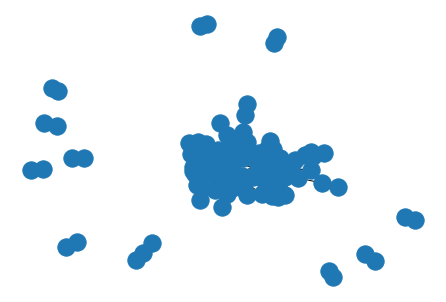

In [9]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')
#Showing a basic visualisation
nx.draw(G)

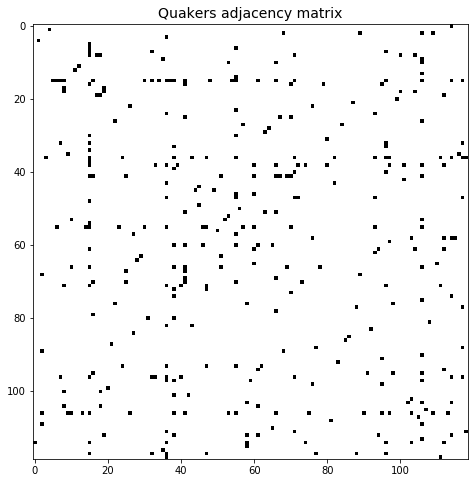

In [10]:
#Adding Adjacency matrix
# show adjacency matrix
A = nx.to_numpy_matrix(G, dtype=np.bool)# adjacency matrix
plt.figure(1, figsize=(8, 8))# control figure size
plt.imshow(A,
           cmap="Greys",# color map
           interpolation="none"
           )
plt.title('Quakers adjacency matrix', fontsize=14);

The next will be showing a representation of the degree of the network which give us a graphical representation of the influencers of the network, showing George Fox the founder of the Quakers in the center and some of the main historical characters like William Penn one of the main brokers of the network.

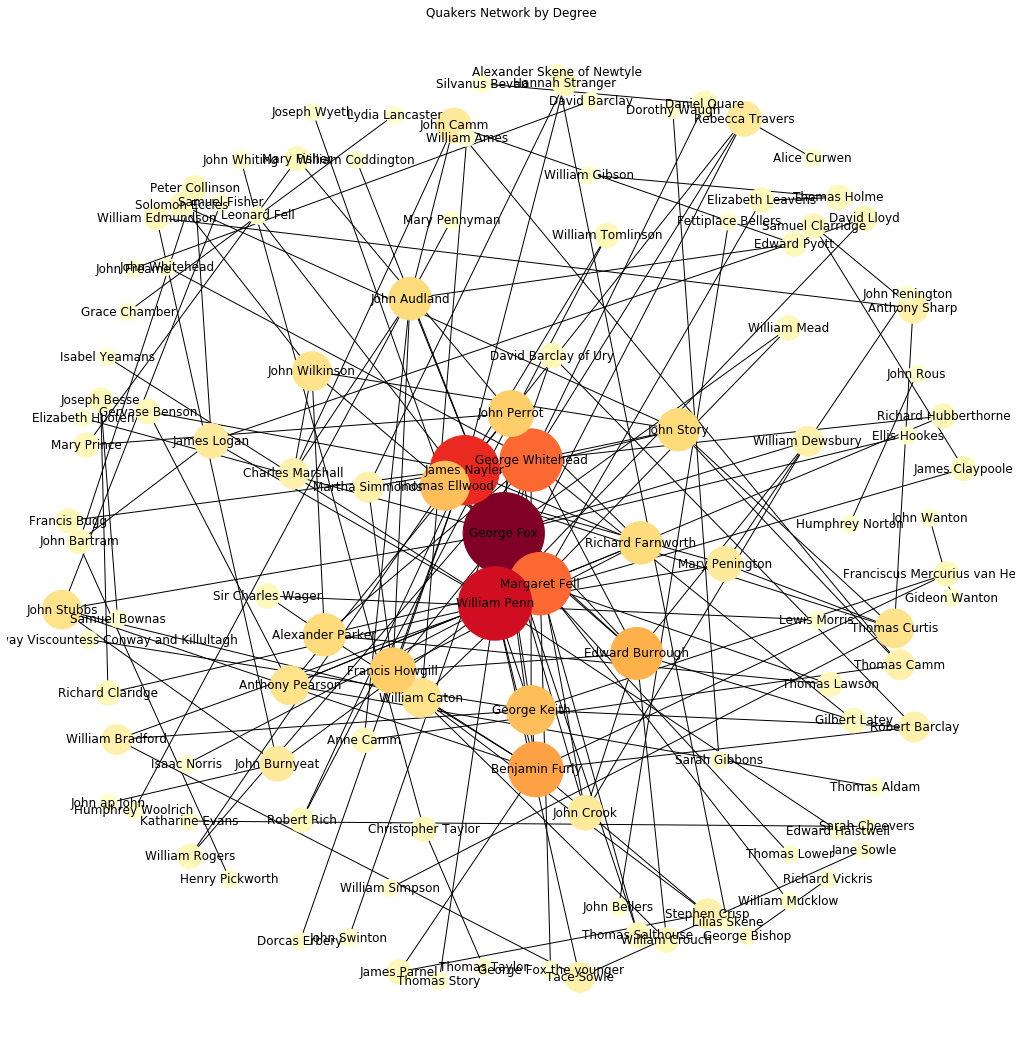

In [11]:


dig = dict(nx.degree(G)) # degree of network
d = np.array(list(dig.values()))
pos=nx.spring_layout(G,k=1) # positions for all nodes
plt.figure(figsize=(14,14)) #Control figure size
nx.draw(G,pos,with_labels=True
        ,node_size = d * 300 # node size
        ,node_color= d # data for label color
        ,font_size= 12 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )
plt.title('Quakers Network by Degree');
plt.savefig('Quaker.png', format="PNG") # Save figure



In [32]:


nx.write_gexf(G, 'quaker_network.gexf')



Now all  nodes have these six attributes, and you can access them at any time. For example, you can print out all the birth years of your nodes by looping through them and accessing the birth_year attribute, like this:

In [14]:
for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

From this statement, you’ll get a line of output for each node in the network. It should look like a simple list of names and years:

In [15]:
density = nx.density(G)
print("Network density:", density)


Network density: 0.02478279447372169


The output of density is a number, so that’s what you’ll see when you print the value. In this case, the density of our network is approximately 0.0248. On a scale of 0 to 1, not a very dense network, which comports with what you can see in the visualization.8 A 0 would mean that there are no connections at all, and a 1 would indicate that all possible edges are present (a perfectly connected network): this Quaker network is on the lower end of that scale, but still far from 0.

A shortest path measurement is a bit more complex. It calculates the shortest possible series of nodes and edges that stand between any two nodes, something hard to see in large network visualizations. This measure is essentially finding friends-of-friends.  Let’s find the shortest path between Margaret Fell and George Whitehead. Since we used names to uniquely identify our nodes in the network, you can access those nodes (as the source and target of your path), using the names directly.

In [16]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)


Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


The output of shortest_path will be a list of the nodes that includes the “source” (Fell), the “target” (Whitehead), and the nodes between them. In this case, we can see that Quaker Founder George Fox is on the shortest path between them. Since Fox is also a hub (see degree centrality, below) with many connections, we might suppose that several shortest paths run through him as a mediator. What might this say about the importance of the Quaker founders to their social network?

In [17]:
print("Length of that path:", len(fell_whitehead_path)-1)


Length of that path: 2


There are many network metrics derived from shortest path lengths. One such measure is diameter, which is the longest of all shortest paths. After calculating all shortest paths between every possible pair of nodes in the network, diameter is the length of the path between the two nodes that are furthest apart. The measure is designed to give you a sense of the network’s overall size, the distance from one end of the network to another.

In [18]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)


False
Network diameter of largest component: 8


Since we took the largest component, we can assume there is no larger diameter for the other components. Therefore this figure is a good stand in for the diameter of the whole Graph. The network diameter of this network’s largest component is 8: there is a path length of 8 between the two farthest-apart nodes in the network. Unlike density which is scaled from 0 to 1, it is difficult to know from this number alone whether 8 is a large or small diameter. For some global metrics, it can be best to compare it to networks of similar size and shape

## Centrality

After getting some basic measures of the entire network structure, a good next step is to find which nodes are the most important ones in your network. In network analysis, measures of the importance of nodes are referred to as centrality measures. Because there are many ways of approaching the question “Which nodes are the most important?” there are many different ways of calculating centrality. Here you’ll learn about three of the most common centrality measures: degree, betweenness centrality, and eigenvector centrality.

You just ran the G.degree() method on the full list of nodes in your network (G.nodes()). Since you added it as an attribute, you can now see William Penn’s degree along with his other information if you access his node directly:

In [19]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
print(G.nodes['William Penn'])


{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531', 'degree': 18}


There’s a lot going on behind the scenes here, but just concentrate on the three input variables you gave to sorted(). The first is the dictionary, degree_dict.items(), you want to sort. The second is what to sort by: in this case, item “1” is the second item in the pair, or the value of your dictionary. Finally, you tell sorted() to go in reverse so that the highest degree nodes will be first in the resulting list. Once you’ve created this sorted list, you can loop through it, and use list slicing3 to get only the first 20 nodes:

In [20]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)


Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


As you can see, Penn’s degree is 18, relatively high for this network. But printing out this ranking information illustrates the limitations of degree as a centrality measure. You probably didn’t need NetworkX to tell you that William Penn, Quaker leader and founder of Pennsylvania, was important. Most social networks will have just a few hubs of very high degree, with the rest of similar, much lower degree.12 Degree can tell you about the biggest hubs, but it can’t tell you that much about the rest of the nodes. And in many cases, those hubs it’s telling you about (like Penn or Quakerism co-founder Margaret Fell, with a degree of 13) are not especially surprising. In this case almost all of the hubs are founders of the religion or otherwise important political figures.

Thankfully there are other centrality measures that can tell you about more than just hubs. Eigenvector centrality is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. If you know a lot of well-connected people, you could spread a message very efficiently. If you’ve used Google, then you’re already somewhat familiar with Eigenvector centrality. Their PageRank algorithm uses an extension of this formula to decide which webpages get to the top of its search results.

Betweenness centrality is a bit different from the other two measures in that it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). To do this, it must first calculate every possible shortest path in your network, so keep in mind that betweenness centrality will take longer to calculate than other centrality measures (but it won’t be an issue in a dataset of this size). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network. If you’re the only thing connecting two clusters, every communication between those clusters has to pass through you. In contrast to a hub, this sort of node is often referred to as a broker. Betweenness centrality is not the only way of finding brokerage (and other methods are more systematic), but it’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves but because they stand between groups, giving the network connectivity and cohesion.

These two centrality measures are even simpler to run than degree—they don’t need to be fed a list of nodes, just the graph G. You can run them with these functions:

In [21]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)



Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


You’ll notice that many, but not all, of the nodes that have high degree also have high betweenness centrality. In fact, betweeness centrality surfaces two women, Elizabeth Leavens and Mary Penington, whose significance had been obscured by the degree centrality metric. An advantage of doing these calculations in Python is that you can quickly compare two sets of calculations. What if you want to know which of the high betweenness centrality nodes had low degree? That is to say: which high-betweenness nodes are unexpected? You can use a combination of the sorted lists from above:

In [22]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)


Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

You can confirm from these results that some people, like Leavens and Penington, have high betweenness centrality but low degree. This could mean that these women were important brokers as you can see in the figure generated in Gephi below, connecting otherwise disparate parts of the graph. You can also learn unexpected things about people you already know about—in this list you can see that Penn has lower degree than Quaker founder George Fox, but higher betweenness centrality. That is to say, simply knowing more people isn’t everything.

![Image of Network](https://github.com/sortega7878/DATA620/raw/master/PRJ1/quakersgender.png)


## Community detection with modularity



In [33]:
communities = community.greedy_modularity_communities(G)


The method greedy_modularity_communities() tries to determine the number of communities appropriate for the graph, and groups all nodes into subsets based on these communities. Unlike the centrality functions, the above code will not create a dictionary. Instead it creates a list of special “frozenset” objects (similar to lists). There’s one set for each group, and the sets contain the names of the people in each group. In order to add this information to your network in the now-familiar way, you must first create a dictionary that labels each person with a number value for the group to which they belong:

In [24]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')


As always, you can combine these measures with others. For example, here’s how you find the highest eigenvector centrality nodes in modularity class 0 (the first one):

In [25]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])


Modularity Class 0 Sorted by Eigenvector Centrality:
Name: William Penn | Eigenvector Centrality: 0.2703220115399868
Name: George Keith | Eigenvector Centrality: 0.18384690867915351
Name: William Bradford | Eigenvector Centrality: 0.06812170326615953
Name: Tace Sowle | Eigenvector Centrality: 0.04688085927497436
Name: James Logan | Eigenvector Centrality: 0.044474460267486554


Using eigenvector centrality as a ranking can give you a sense of the important people within this modularity class. You’ll notice that some of these people, especially William Penn, William Bradford (not the Plymouth founder you’re thinking of), and James Logan, spent lots of time in America. Also, Bradford and Tace Sowle were both prominent Quaker printers. With just a little bit of digging, we can discover that there are both geographical and occupational reasons that this group of people belongs together. This is an indication that modularity is probably working as expected.

In smaller networks like this one, a common task is to find and list all of the modularity classes and their members.14 You can do this by looping through the communities list:

In [26]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['Isabel Yeamans', 'George Keith', 'William Bradford', 'Tace Sowle', 'Joseph Besse', 'Thomas Story', 'Anne Conway Viscountess Conway and Killultagh', 'Isaac Norris', 'James Logan', 'Jane Sowle', 'Samuel Bownas', 'John Bartram', 'Edward Haistwell', 'David Lloyd', 'William Penn', 'Peter Collinson', 'Richard Claridge']
Class 1: ['Anthony Pearson', 'William Gibson', 'Margaret Fell', 'Thomas Lower', 'Gervase Benson', 'Francis Howgill', 'Martha Simmonds', 'Thomas Aldam', 'Richard Farnworth', 'William Tomlinson', 'George Fox the younger', 'Dorcas Erbery', 'Robert Rich', 'Hannah Stranger', 'Thomas Holme', 'Elizabeth Leavens', 'James Nayler']
Class 2: ['Thomas Salthouse', 'William Coddington', 'John Perrot', 'William Mucklow', 'Elizabeth Hooten', 'Mary Fisher', 'William Mead', 'Ellis Hookes', 'William Dewsbury', 'Leonard Fell', 'George Fox', 'Mary Prince', 'Edward Burrough', 'William Crouch', 'John Crook']
Class 3: ['Thomas Lawson', 'George Whitehead', 'Silvanus Bevan', 'Alexander Park

And here an example of the communities identified in Gephi

![Image of Network](https://github.com/sortega7878/DATA620/raw/master/PRJ1/quakercommuni.png)

## Exporting Data

In [27]:
nx.write_gexf(G, 'quaker_network.gexf')


## Conclusions

This network of Quakers in early modern Britain has relatively low density, suggesting loose associations and/or incomplete original data. You know that the community is organized around several disproportionately large hubs, among them founders of the denomination like Margaret Fell and George Fox, as well as important political and religious leaders like William Penn. More helpfully, you know about women with relatively low degree, like Elizabeth Leavens and Mary Penington, who (as a result of high betweenness centrality) may have acted as brokers, connecting multiple groups. Finally you learned that the network is made of one large component and many very small ones. Within that largest component, there are several distinct communities, some of which seem organized around time or place (like Penn and his American associates). Because of the metadata you added to your network, you have the tools to explore these metrics further and to potentially explain some of the structural features you identified.